In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
games = pd.read_csv("Datasets/games_ml.csv")

In [17]:
games.dtypes

release_date                          float64
price                                 float64
early_access                            int64
genres_Accounting                       int64
genres_Action                           int64
                                       ...   
publisher_Wizards of the Coast LLC      int64
publisher_505 Games                     int64
publisher_Sekai Project                 int64
publisher_AGM PLAYISM                   int64
publisher_Focus Home Interactive        int64
Length: 138, dtype: object

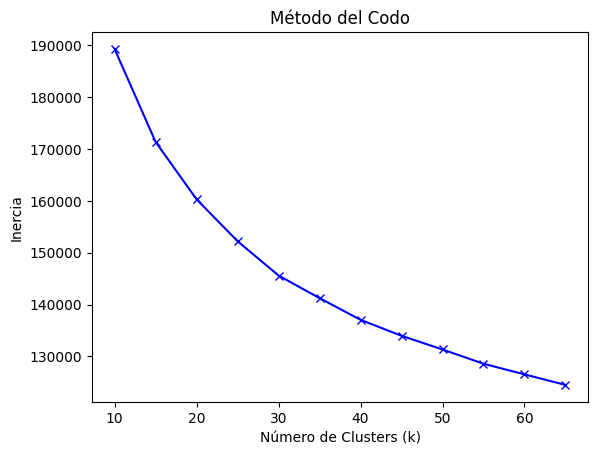

In [18]:
# Método del codo (Elbow Method)
# Consiste en calcular la inercia para distintas instancias del algoritmo de clustering,
# graficarlas y determinar el punto de inflexión más fuerte (codo). 
# Ese será el n de clusters más eficiente

n_clusters = range(10, 70, 5)
elbow_scores = []
silhouette_scores = []

for k in n_clusters:
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(np.array(games))
    elbow_scores.append(kmeans.inertia_)

# Graficar la suma de las distancias cuadradas intra-cluster (inertias) en función de k
plt.plot(n_clusters, elbow_scores, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Por el gráfico notamos el codo en k = 30 clusters

In [19]:
# Creamos las instancia de KMeans con el valor de cluster óptimo y hacemos las predicciones
kmeans = KMeans(n_clusters = 30, n_init = 10, random_state = 123)
kmeans.fit(games)
labels = kmeans.predict(games)

# Exportamos las predicciones para ser consumidas por el modelo de ML
# Convertimos el array de labels a texto y con los valores tipo entero
np.savetxt('Datasets/labels.csv', labels, delimiter = ',', fmt = '%d')  